<a href="https://colab.research.google.com/github/jedrekf1/PUMprojekt/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("winequality-red.csv", delimiter=";")

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df.shape

(1599, 12)

In [7]:
df = df.drop_duplicates()

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
df.dropna(inplace=True)

In [11]:
df['citric acid'] = pd.to_numeric(df['citric acid'], errors='coerce')
df['residual sugar'] = pd.to_numeric(df['residual sugar'], errors='coerce')
df['chlorides'] = pd.to_numeric(df['chlorides'], errors='coerce')

In [12]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

<Axes: >

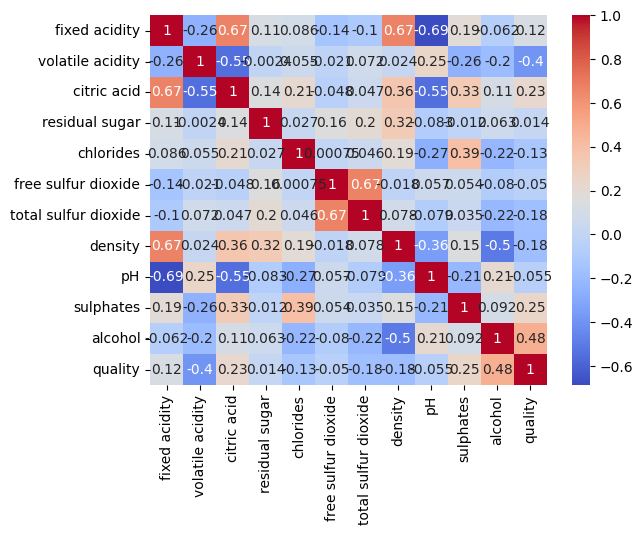

In [13]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

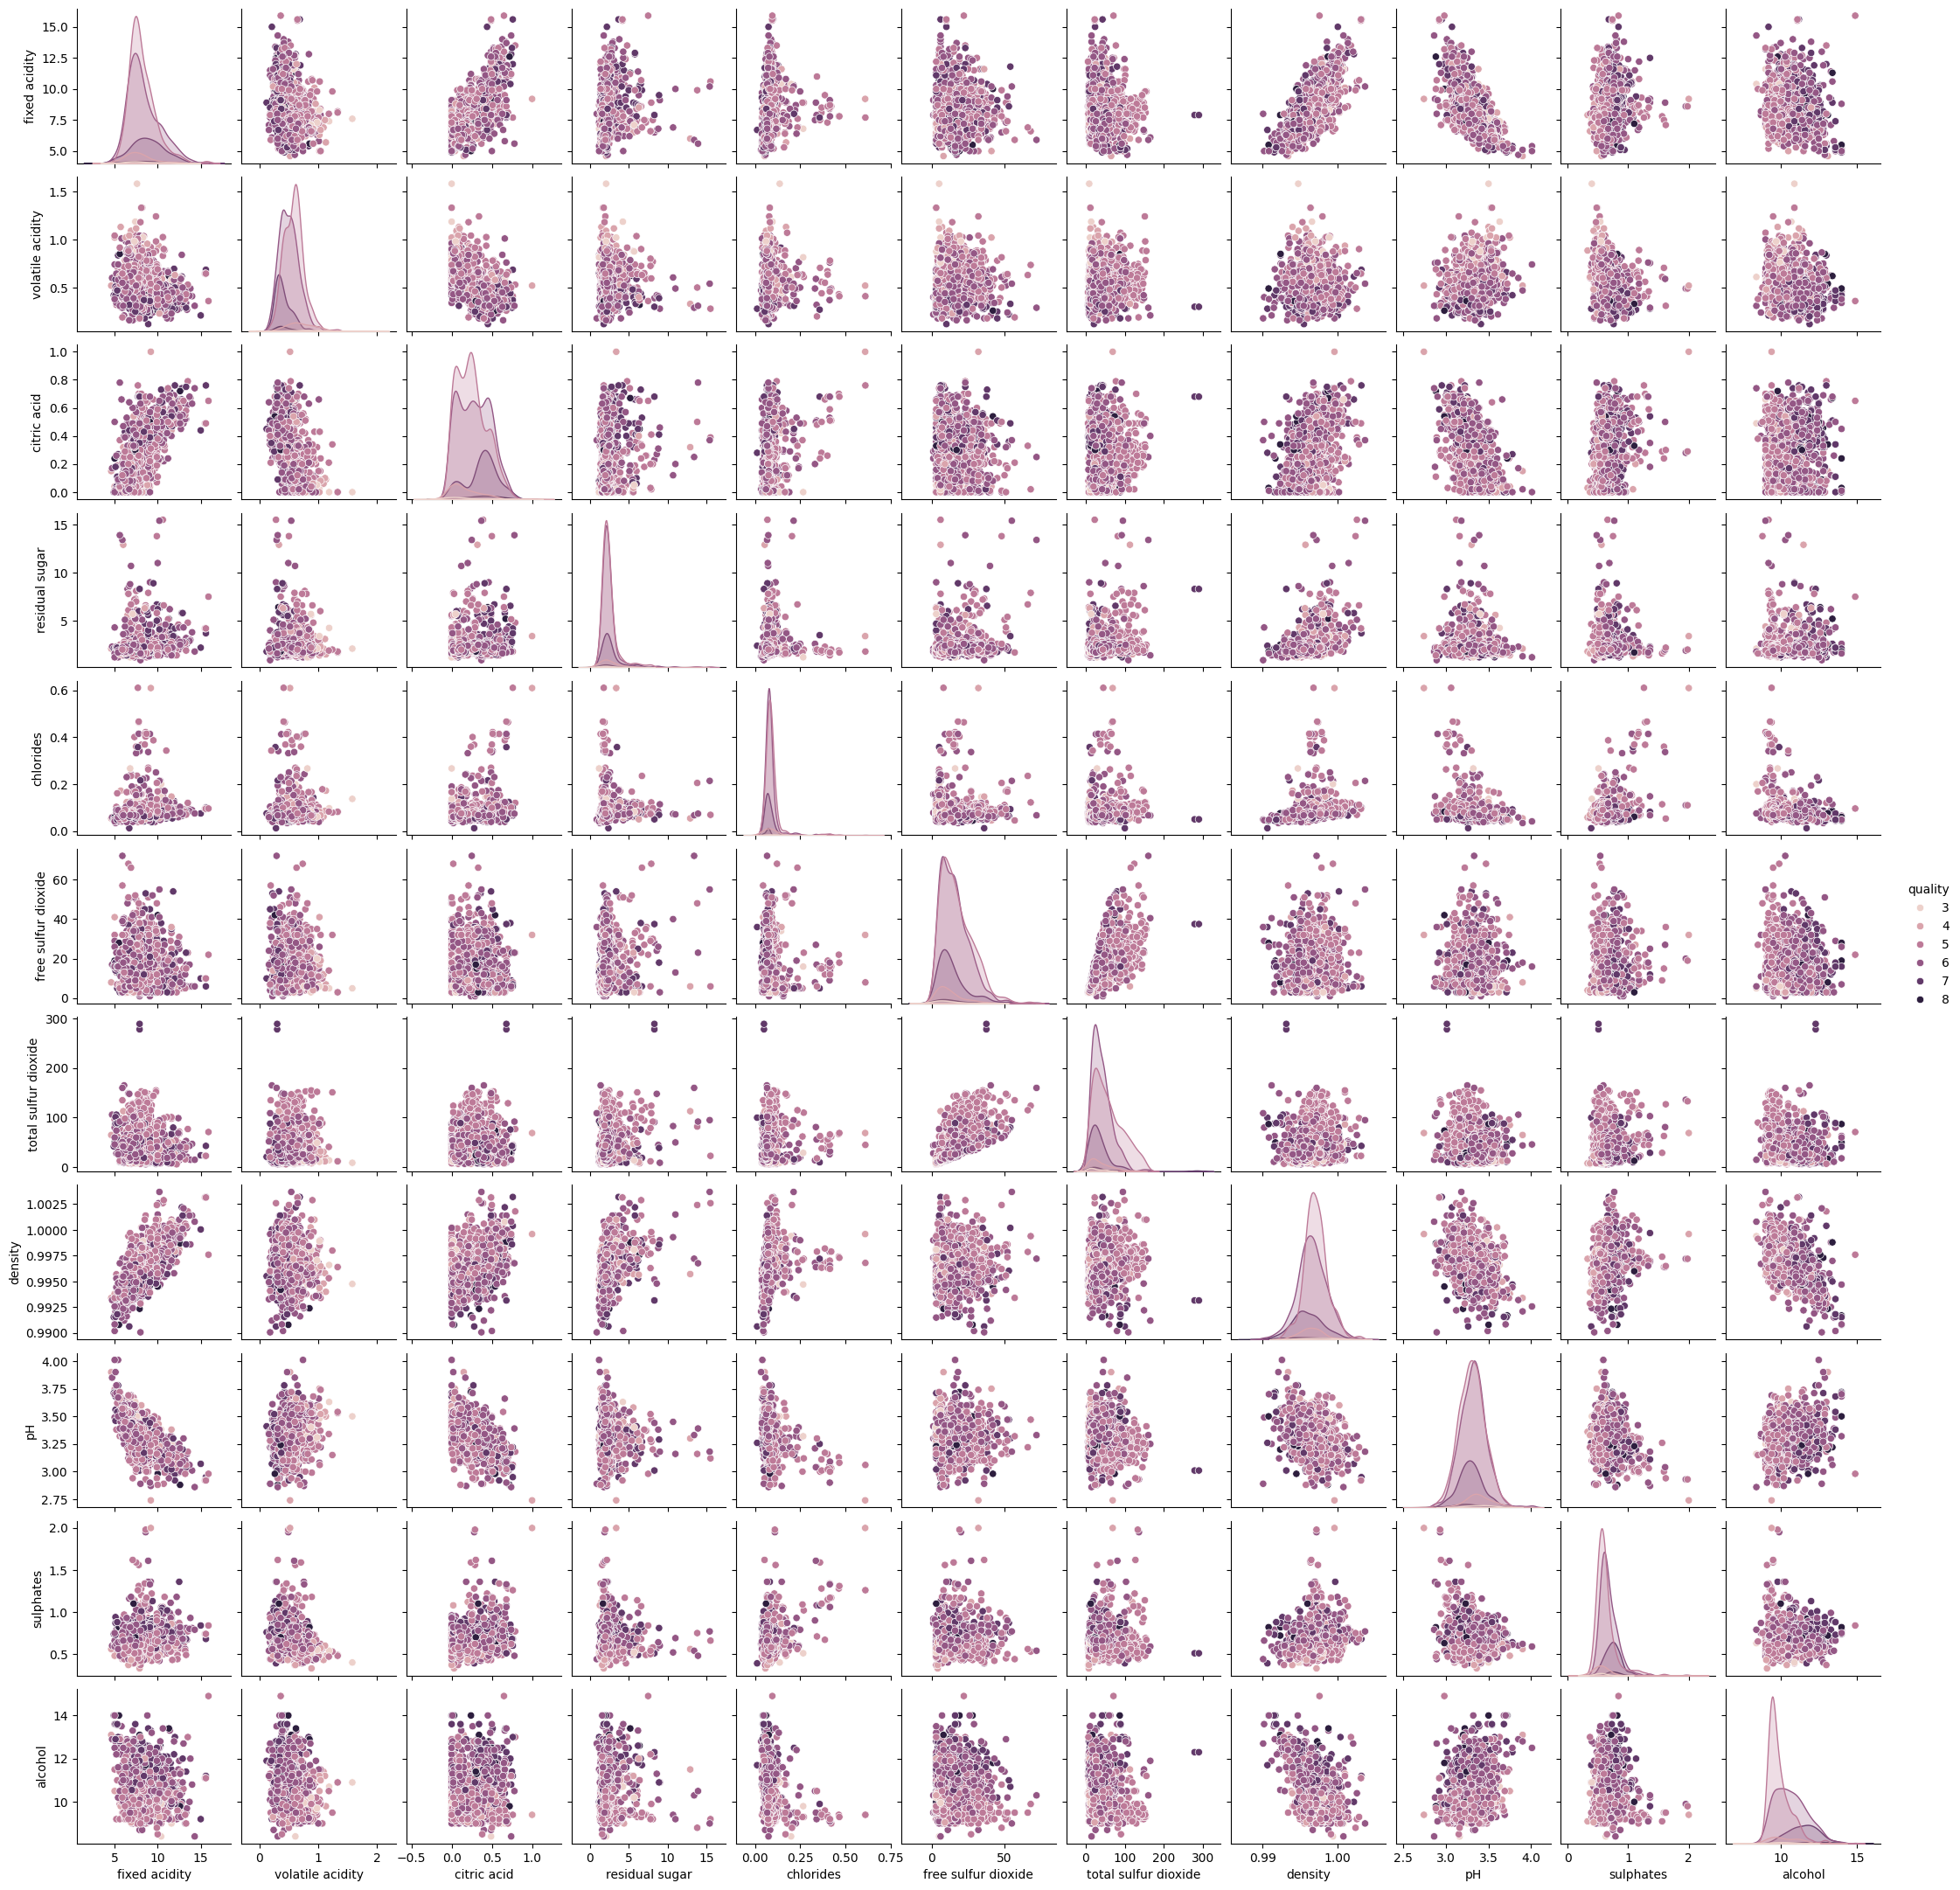

In [14]:
sns.pairplot(df, hue='quality', height=2)

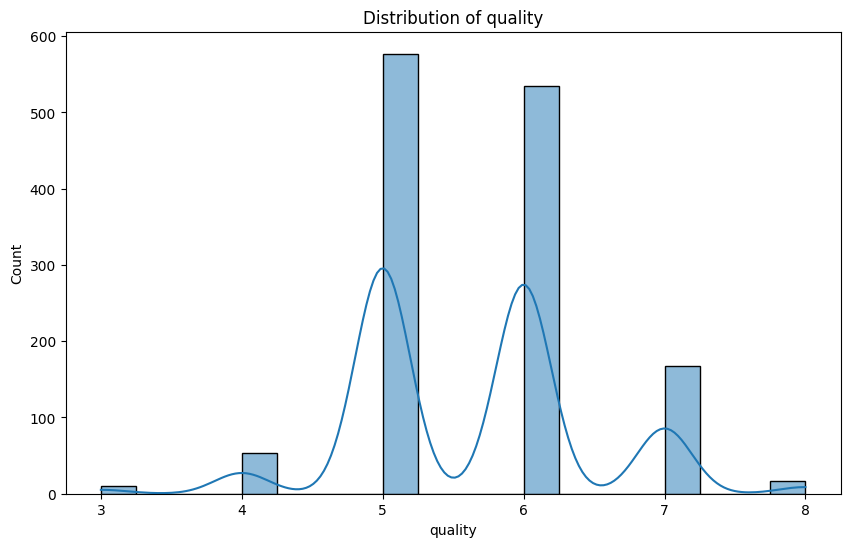

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], bins=20, kde=True)
plt.xlabel('quality')
plt.ylabel('Count')
plt.title('Distribution of quality')
plt.show()

In [16]:
df = df.abs()

In [17]:
df.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [18]:
df.min()

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [19]:
df.mean()

fixed acidity            8.310596
volatile acidity         0.529478
citric acid              0.272333
residual sugar           2.523400
chlorides                0.088124
free sulfur dioxide     15.893304
total sulfur dioxide    46.825975
density                  0.996709
pH                       3.309787
sulphates                0.658705
alcohol                 10.432315
quality                  5.623252
dtype: float64

In [20]:
df1 = df.copy()
df1 = df1.drop_duplicates()
df1.shape

(1359, 12)

In [21]:
for column in df1.columns:
  q1 = df1[column].quantile(0.25)
  q3 = df1[column].quantile(0.75)
  iqr = q3 - q1

  df1 = df1.drop(df1.loc[df1[column] > q3 + 10*iqr].index)
  df1 = df1.drop(df1.loc[df1[column] < q1 - 10*iqr].index)

df1.shape

(1330, 12)

In [22]:
sns.pairplot(df1, hue='quality', height=2)

In [23]:
df1.max()

fixed acidity            15.9000
volatile acidity          1.5800
citric acid               0.7900
residual sugar            9.0000
chlorides                 0.2700
free sulfur dioxide      68.0000
total sulfur dioxide    289.0000
density                   1.0032
pH                        4.0100
sulphates                 1.9800
alcohol                  14.9000
quality                   8.0000
dtype: float64

In [24]:
df1['total sulfur dioxide'].sort_values()

915       6.0
979       6.0
1287      7.0
813       7.0
986       7.0
        ...  
109     153.0
651     155.0
354     165.0
1079    278.0
1081    289.0
Name: total sulfur dioxide, Length: 1330, dtype: float64

In [25]:
df1['free sulfur dioxide'].sort_values()

530      1.0
773      1.0
774      2.0
36       3.0
915      3.0
        ... 
925     53.0
584     54.0
1131    57.0
1558    66.0
396     68.0
Name: free sulfur dioxide, Length: 1330, dtype: float64

In [26]:
df1['fixed acidity'].sort_values()

45       4.6
95       4.7
821      4.9
553      5.0
1270     5.0
        ... 
243     15.0
554     15.5
442     15.6
557     15.6
652     15.9
Name: fixed acidity, Length: 1330, dtype: float64

In [27]:
df1 = df1[df1['total sulfur dioxide'] <= 200]

In [28]:
df1.shape

(1328, 12)

**MODEL** - *regresja liniowa*

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [30]:
X = df1.drop(columns=['quality'])
y= df1['quality']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [32]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)

In [34]:
rl_mse = mean_squared_error(y_test, y_pred)
rl_r2 = r2_score(y_test, y_pred)
rl_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [35]:
print(f"MSE: {rl_mse}")
print(f"RMSE: {rl_rmse}")
print(f"R2: {rl_r2}")

MSE: 0.4315876851806112
RMSE: 0.656953335618757
R2: 0.4041828136374588


In [36]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': regressor.coef_})
print(coefficients)

                 Feature  Coefficient
0          fixed acidity     0.104497
1       volatile acidity    -1.170370
2            citric acid    -0.016956
3         residual sugar    -0.008192
4              chlorides    -0.438418
5    free sulfur dioxide     0.206074
6   total sulfur dioxide    -0.464140
7                density    -0.067469
8                     pH    -0.410055
9              sulphates     1.446988
10               alcohol     1.667819


In [37]:
coefficients['Absolute Coefficient'] = abs(coefficients['Coefficient'])

sorted_coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)
print(sorted_coefficients)

                 Feature  Coefficient  Absolute Coefficient
10               alcohol     1.667819              1.667819
9              sulphates     1.446988              1.446988
1       volatile acidity    -1.170370              1.170370
6   total sulfur dioxide    -0.464140              0.464140
4              chlorides    -0.438418              0.438418
8                     pH    -0.410055              0.410055
5    free sulfur dioxide     0.206074              0.206074
0          fixed acidity     0.104497              0.104497
7                density    -0.067469              0.067469
2            citric acid    -0.016956              0.016956
3         residual sugar    -0.008192              0.008192


**MODEL** - *drzewo decyzyjne*

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df1.drop(columns=['quality'])

y= df1['quality']

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled , y_train)
y_pred = tree_reg.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_r2 = r2_score(y_test , y_pred)
print(f"MSE: {dt_mse}")
print(f"RMSE: {dt_rmse}")
print(f"R2: {dt_r2}")

MSE: 0.9060150375939849
RMSE: 0.951848221931409
R2: -0.2507755643572085


**MODEL** - *las losowy*

In [42]:
from sklearn.ensemble import RandomForestRegressor

X = df1.drop(columns=['quality'])

y= df1['quality']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_scaled , y_train)
y_pred = rf_regressor.predict(X_test_scaled)

In [45]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_r2 = r2_score(y_test , y_pred)
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R2: {rf_r2}")

MSE: 0.4258285714285715
RMSE: 0.6525554163659754
R2: 0.41332767018017547


**PORÓWNANIE WYNIKÓW**

In [46]:
from prettytable import PrettyTable

table = PrettyTable()

table.add_column("", ["Linear Regression", "Decision Tree", "Random Forest"])
table.add_column("R2 score", [rl_r2, dt_r2, rf_r2])
table.add_column("RMSE", [rl_rmse, dt_rmse, rf_rmse])
table.add_column("MSE", [rl_mse, dt_mse, rf_mse])

print(table)

+-------------------+---------------------+--------------------+--------------------+
|                   |       R2 score      |        RMSE        |        MSE         |
+-------------------+---------------------+--------------------+--------------------+
| Linear Regression |  0.4041828136374588 | 0.656953335618757  | 0.4315876851806112 |
|   Decision Tree   | -0.2507755643572085 | 0.951848221931409  | 0.9060150375939849 |
|   Random Forest   | 0.41332767018017547 | 0.6525554163659754 | 0.4258285714285715 |
+-------------------+---------------------+--------------------+--------------------+


**ANALIZA WYNIKÓW**

*Linear Regression*

* R²: 0.404 -
Model regresji liniowej wyjaśnia 40.4% wariancji zmiennej zależnej.

* RMSE: 0.657 -
Średni błąd prognoz modelu wynosi około 0.657 jednostki.

* MSE: 0.432 -
Średnia kwadratowa różnica między rzeczywistymi a przewidywanymi wartościami wynosi 0.432.

* Ocena: Model regresji liniowej osiąga umiarkowane wyniki, wyjaśniając część wariancji danych i generując średni błąd prognozy na poziomie 0.657 jednostki. Jest to punkt odniesienia dla porównania z innymi modelami.


---


*Decision Tree*

* R²: -0.251 -
Ujemna wartość R² wskazuje, że model drzewa decyzyjnego jest gorszy niż model przewidujący stałą średnią wartość zmiennej zależnej.
* RMSE: 0.952 -
Średni błąd prognoz modelu wynosi około 0.952 jednostki, co jest znacznie wyższe niż w przypadku regresji liniowej.
* MSE: 0.906 -
Średnia kwadratowa różnica między rzeczywistymi a przewidywanymi wartościami wynosi 0.906.
* Ocena: Model drzewa decyzyjnego wykazuje znacząco gorsze wyniki w porównaniu do regresji liniowej, sugerując, że model jest przetrenowany i nie generalizuje dobrze na danych testowych.
---
*Random Forest*

* R²: 0.413 -
Model lasu losowego wyjaśnia 41.3% wariancji zmiennej zależnej, co jest nieco lepsze niż regresja liniowa.
* RMSE: 0.653 -
Średni błąd prognoz modelu wynosi około 0.653 jednostki, co jest nieco niższe niż w przypadku regresji liniowej.
* MSE: 0.426-
Średnia kwadratowa różnica między rzeczywistymi a przewidywanymi wartościami wynosi 0.426.
* Ocena: Model lasu losowego osiąga najlepsze wyniki spośród trzech analizowanych modeli. Jest nieco lepszy niż regresja liniowa pod względem R², RMSE i MSE, sugerując, że jest bardziej skuteczny w przewidywaniu zmiennej zależnej.
---
*Podsumowanie*
* Linear Regression: Umiarkowane wyniki, stanowi dobry punkt odniesienia.
* Decision Tree: Słabe wyniki, prawdopodobnie z powodu overfittingu. Konieczne są regulacje hiperparametrów lub inne techniki, aby poprawić wyniki.
* Random Forest: Najlepsze wyniki w tej analizie, przewyższające zarówno regresję liniową, jak i drzewo decyzyjne. Las losowy dobrze radzi sobie z danymi, wyjaśniając największą część wariancji i generując najmniejszy błąd prognozy.

---



# Modele z hiperparametryzacją

**Random Forest**

In [47]:
from sklearn.model_selection import GridSearchCV
X = df1.drop(columns=['quality'])
y = df1['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [49]:
best_rf_regressor = grid_search.best_estimator_

y_pred = best_rf_regressor.predict(X_test_scaled)

hrf_mse = mean_squared_error(y_test, y_pred)
hrf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
hrf_r2 = r2_score(y_test, y_pred)

print(f"MSE: {hrf_mse}")
print(f"RMSE: {hrf_rmse}")
print(f"R2: {hrf_r2}")

MSE: 0.43607735433695544
RMSE: 0.6603615330536413
R2: 0.39798471731477914


In [50]:
!pip install lime
!pip install shap

import lime
from lime.lime_tabular import LimeTabularExplainer
import shap
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=d2218e623fa1a718351cd86a63e65a9b81ff8633ba36b321c1a25c8f3c67fc58
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.4 MB/s eta 0:00:00


In [66]:
feat_importances = pd.DataFrame(best_rf_regressor.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
print(feat_importances)

                      Importance
alcohol                 0.344633
sulphates               0.159093
volatile acidity        0.126168
total sulfur dioxide    0.069639
pH                      0.046095
chlorides               0.045858
residual sugar          0.045788
citric acid             0.042868
free sulfur dioxide     0.041300
fixed acidity           0.039876
density                 0.038682


# Wnioski i obserwacje

* *Kluczowe Cechy* - alcohol i sulphates są najważniejszymi pozytywnymi cechami wpływającymi na jakość wina. Te cechy powinny być priorytetem dla producentów wina.
Volatile acidity jest najważniejszą negatywną cechą, którą należy kontrolować, aby poprawić jakość wina.
* Z*naczenie Cech o Umiarkowanym Wpływie* - total sulfur dioxide, pH, chlorides, residual sugar, i citric acid mają umiarkowany wpływ na jakość wina. Mogą być również uwzględniane przy optymalizacji procesów produkcyjnych.
* *Mniejsze Ważności* - free sulfur dioxide, fixed acidity, i density mają najmniejszy wpływ na jakość wina, ale nadal mogą być monitorowane w procesie produkcyjnym.

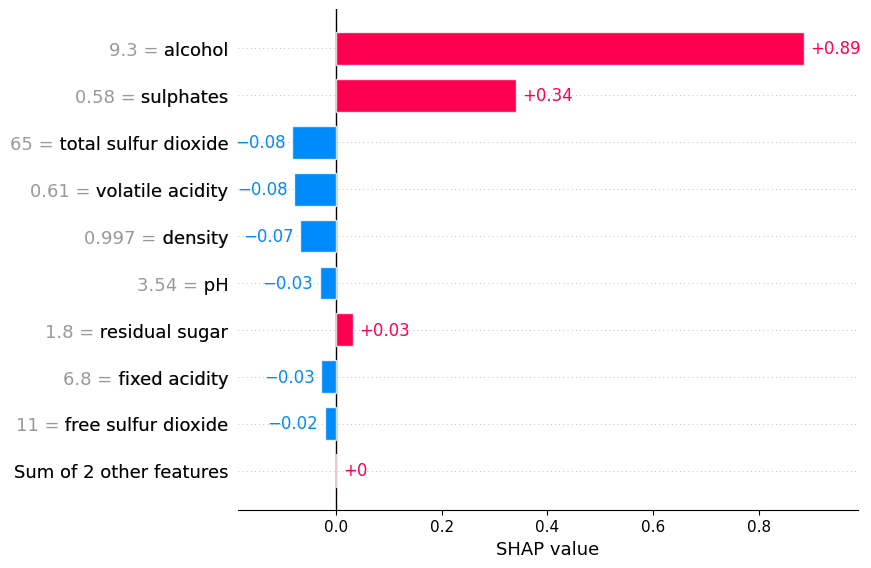

fixed acidity            6.8000
volatile acidity         0.6100
citric acid              0.2000
residual sugar           1.8000
chlorides                0.0770
free sulfur dioxide     11.0000
total sulfur dioxide    65.0000
density                  0.9971
pH                       3.5400
sulphates                0.5800
alcohol                  9.3000
Name: 183, dtype: float64


In [52]:
shap.initjs()
# Create the explainer
explainer = shap.Explainer(best_rf_regressor,  feature_names = X_train.columns)
# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)
shap.plots.bar(explainer(X_test.values[5]))
print(X_test.iloc[5])



# Wnioski i obserwacje

* *Pozytywne Cechy* -  alcohol: zawartość alkoholu ma pozytywny wpływ na jakość wina, choć w tej instancji jest średnia,
sulphates: zawartość siarczanów ma umiarkowany pozytywny wpływ.
* *Negatywne Cechy* - volatile acidity: kwasowość lotna ma negatywny wpływ na jakość wina,
total sulfur dioxide, wysoka zawartość całkowitego dwutlenku siarki ma negatywny wpływ.
* *Strategie optymalizacji* - producent wina może skupić się na optymalizacji zawartości alkoholu i siarczanów, jednocześnie kontrolując kwasowość lotną i całkowity dwutlenek siarki, aby poprawić jakość swojego produktu

**Linear Regression**

In [53]:
from sklearn.linear_model import Ridge
X = df1.drop(columns=['quality'])
y = df1['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
ridge_regressor = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_search = GridSearchCV(estimator=ridge_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'alpha': 1.0, 'solver': 'saga'}


In [55]:
best_ridge_regressor = grid_search.best_estimator_


y_pred = best_ridge_regressor.predict(X_test_scaled)

hrl_mse = mean_squared_error(y_test, y_pred)
hrl_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
hrl_r2 = r2_score(y_test, y_pred)

print(f"MSE: {hrl_mse}")
print(f"RMSE: {hrl_rmse}")
print(f"R2: {hrl_r2}")

MSE: 0.4415886405152806
RMSE: 0.6645213619706146
R2: 0.3689016977054841


In [64]:
feat_importances = pd.DataFrame(best_ridge_regressor.coef_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
print(feat_importances)

                      Importance
alcohol                 1.749577
sulphates               1.406101
free sulfur dioxide     0.250132
fixed acidity           0.215814
residual sugar         -0.107714
citric acid            -0.126058
density                -0.202724
chlorides              -0.347401
pH                     -0.384311
total sulfur dioxide   -0.458337
volatile acidity       -1.580096


# Wnioski i obserwacje

* *Najważniejsze Cechy*: alcohol i sulphates są najważniejszymi pozytywnymi cechami wpływającymi na jakość wina. Podkreślają one, że wyższa zawartość alkoholu i siarczanów jest pozytywnie skorelowana z jakością wina.

* *Negatywne Cechy*: volatile acidity, total sulfur dioxide, pH, i chlorides są cechami, które mają znaczący negatywny wpływ na jakość wina. Należy je kontrolować, aby poprawić jakość wina.

* *Strategie Optymalizacji*: Producent wina powinien dążyć do optymalizacji zawartości alkoholu i siarczanów, jednocześnie kontrolując poziomy kwasowości lotnej, chlorków i całkowitego dwutlenku siarki, aby poprawić jakość swojego produktu.

In [57]:
shap.initjs()
explainer = shap.LinearExplainer(best_ridge_regressor, X_train_scaled, feature_names=X_train.columns)

# Evaluate SHAP values for the test set
shap_values = explainer(X_test_scaled)

# Create a bar plot for the 5th instance
shap.plots.bar(shap_values[5])

# Print the features of the 5th instance
print(X_test.iloc[5])

fixed acidity            6.400
volatile acidity         0.865
citric acid              0.030
residual sugar           3.200
chlorides                0.071
free sulfur dioxide     27.000
total sulfur dioxide    58.000
density                  0.995
pH                       3.610
sulphates                0.490
alcohol                 12.700
Name: 729, dtype: float64


# Wnioski i obserwacje

* *Pozytywne Cechy*:
alcohol - wysoka zawartość alkoholu ma największy pozytywny wpływ na jakość wina, free sulfur dioxide -  wysoka zawartość wolnego dwutlenku siarki również pozytywnie wpływa na jakość.

* *Negatywne Cechy*:
volatile acidity - wysoka kwasowość lotna ma największy negatywny wpływ na jakość wina,
total sulfur dioxide - wysokie stężenie całkowitego dwutlenku siarki ma również negatywny wpływ.

* *Strategie Optymalizacji*: Producent wina może skupić się na optymalizacji zawartości alkoholu i wolnego dwutlenku siarki, jednocześnie kontrolując kwasowość lotną i całkowity dwutlenek siarki, aby poprawić jakość swojego produktu.

**Decision Tree**

In [58]:
X = df1.drop(columns=['quality'])
y = df1['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
tree_reg = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20}


In [60]:
best_tree_reg = grid_search.best_estimator_

y_pred = best_tree_reg.predict(X_test_scaled)

hdt_mse = mean_squared_error(y_test, y_pred)
hdt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
hdt_r2 = r2_score(y_test, y_pred)

print(f"MSE: {hdt_mse}")
print(f"RMSE: {hdt_rmse}")
print(f"R2: {hdt_r2}")

MSE: 0.5232050748207078
RMSE: 0.7233291607703285
R2: 0.2522592200607162


In [65]:
feat_importances = pd.DataFrame(best_tree_reg.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
print(feat_importances)

                      Importance
volatile acidity        0.311398
alcohol                 0.230240
sulphates               0.127796
density                 0.099449
residual sugar          0.061449
total sulfur dioxide    0.051652
free sulfur dioxide     0.045684
chlorides               0.036791
pH                      0.020398
citric acid             0.013054
fixed acidity           0.002090


# Wnioski i obserwacje

* *Kluczowe Cechy* - volatile acidity jest najważniejszą cechą negatywnie wpływającą na jakość wina. Kontrola tej cechy jest kluczowa dla poprawy jakości.
alcohol i sulphates są również kluczowymi cechami pozytywnie wpływającymi na jakość wina.
* *Znaczenie Cech o Umiarkowanym Wpływie* - density, residual sugar, total sulfur dioxide i free sulfur dioxide mają umiarkowany wpływ na jakość wina. Optymalizacja tych cech może również przyczynić się do poprawy jakości.
* *Mniejsze Ważności* - chlorides, pH, citric acid, i fixed acidity mają najmniejszy wpływ na jakość wina, ale mogą być monitorowane w procesie produkcyjnym.

In [62]:
shap.initjs()
# Create the explainer
explainer = shap.Explainer(best_tree_reg,  feature_names = X_train.columns)
# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)
shap.plots.bar(explainer(X_test.values[5]))
print(X_test.iloc[5])

fixed acidity            6.400
volatile acidity         0.865
citric acid              0.030
residual sugar           3.200
chlorides                0.071
free sulfur dioxide     27.000
total sulfur dioxide    58.000
density                  0.995
pH                       3.610
sulphates                0.490
alcohol                 12.700
Name: 729, dtype: float64


# Wnioski i obserwacje

* *Pozytywne Cechy* - alcohol: zawartość alkoholu ma pozytywny wpływ na jakość wina, zwłaszcza że jest wysoka, sulphates: Zawartość siarczanów ma umiarkowany pozytywny wpływ.
* *Negatywne Cechy* - volatile acidity: kwasowość lotna ma negatywny wpływ na jakość wina, total sulfur dioxide: wysoka zawartość całkowitego dwutlenku siarki ma negatywny wpływ.
* *Strategie Optymalizacji* - producent wina może skupić się na optymalizacji zawartości alkoholu i siarczanów, jednocześnie kontrolując kwasowość lotną i całkowity dwutlenek siarki, aby poprawić jakość swojego produktu.

In [63]:
from prettytable import PrettyTable

table = PrettyTable()

table.add_column("", ["Linear Regression", "Decision Tree", "Random Forest"])
table.add_column("R2 score", [hrl_r2, hdt_r2, hrf_r2])
table.add_column("RMSE", [hrl_rmse, hdt_rmse, hrf_rmse])
table.add_column("MSE", [hrl_mse, hdt_mse, hrf_mse])

print(table)

+-------------------+---------------------+--------------------+---------------------+
|                   |       R2 score      |        RMSE        |         MSE         |
+-------------------+---------------------+--------------------+---------------------+
| Linear Regression |  0.3689016977054841 | 0.6645213619706146 |  0.4415886405152806 |
|   Decision Tree   |  0.2522592200607162 | 0.7233291607703285 |  0.5232050748207078 |
|   Random Forest   | 0.39798471731477914 | 0.6603615330536413 | 0.43607735433695544 |
+-------------------+---------------------+--------------------+---------------------+


**ANALIZA WYNIKÓW**

*Linear Regression*
* Osiąga umiarkowane wyniki we wszystkich trzech metrykach (R²: 0.369, RMSE: 0.665, MSE: 0.442). Model ten wyjaśnia około 36.9% wariancji i ma średni błąd predykcji na poziomie 0.665 jednostki.

*Decision Tree*
* Wyniki są gorsze w porównaniu do regresji liniowej (R²: 0.252, RMSE: 0.723, MSE: 0.523), co sugeruje, że model ten ma problemy z przetrenowaniem lub nie jest odpowiednio dostrojony.

*Random Forest*
* Osiąga najlepsze wyniki we wszystkich trzech metrykach (R²: 0.398, RMSE: 0.660, MSE: 0.436), wyjaśniając największą część wariancji i mając najmniejszy średni błąd predykcji.